In [2]:
from data import *

## 使用全连接神经网络进行房价回归

In [21]:
import keras
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import BatchNormalization,Activation
from keras import optimizers

2.2.4
1.12.0


#### 练习一

请使用如下的简单神经网络进行机器学习通过动态调整来得到最好的结果

1.网络隐藏层数1~6层

2.每层的神经元个数10~100

In [ ]:
def create_model():
    model=Sequential()
    model.add(Dense(10,input_dim=X_train.shape[1],activation='relu'))
    model.add(Dense(300,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam',loss='mean_squared_error')
    return model

In [19]:
@timeit
def test(model, batch_size, epochs):
    history=model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=epochs,batch_size=batch_size,verbose=0)
    benchmark1(model,X_test,y_test)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

RMSE: 20567.55535425959
LRMSE: 0.1371214565688996
'test1' ((), {'model': <keras.engine.sequential.Sequential object at 0x0000021E2F97B940>, 'batch_size': 32, 'epochs': 3320}) 205.99 sec


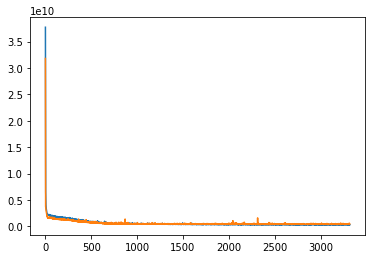

In [12]:
test(model=create_model(), batch_size=32, epochs=3320)

#### 练习二

使用BatchNormalization层

使用SGD进行训练

In [28]:
def create_model2():
    model=Sequential()
    model.add(Dense(10,input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(300))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))
    sgd = optimizers.SGD(lr=0.001, decay=1e-4, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    return model

In [29]:
test(model=create_model2(), batch_size=32, epochs=3000)

E:\WorkSpace\AI-Course\04 - 机器学习实战\data.py:22: RuntimeWarning: invalid value encountered in less
  if pred[pred<0].shape[0]>0:


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

#### 练习三

数据使用log或者万为单位

In [30]:
y_train_log=np.log(y_train)
y_train_wan=y_train/10000
y_test_log=np.log(y_test)
y_test_wan=y_test/10000
from sklearn.preprocessing import RobustScaler
def create_model3():
    model=Sequential()
    model.add(Dense(10,input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(300))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))
    #sgd = optimizers.SGD(optimizer='adam',loss='mean_squared_error')
    model.compile(optimizer='adam',loss='mean_squared_error')
    return model

RMSE: 22733.686840868675
LRMSE: 0.12419759889992221
'test' ((), {'model': <keras.engine.sequential.Sequential object at 0x0000021E3784DEB8>, 'batch_size': 32, 'epochs': 3000}) 216.93 sec


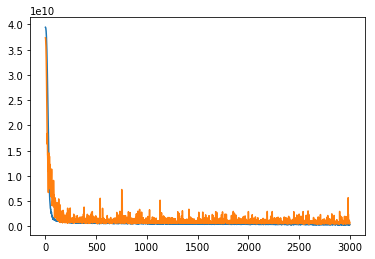

In [31]:
test(model=create_model3(), batch_size=32, epochs=3000)

#### 练习四

使用RobustScaler进行训练

In [32]:
#from data import * # reinitial data
transformer=RobustScaler().fit(X_train)
X_train_norm=transformer.transform(X_train)
X_test_norm=transformer.transform(X_test)

In [33]:
def create_model4():
    model=Sequential()
    model.add(Dense(10,input_dim=X_train.shape[1]))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(300))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))
    #sgd = optimizers.SGD(optimizer='adam',loss='mean_squared_error')
    model.compile(optimizer='adam',loss='mean_squared_error')
    return model

RMSE: 30985.720304846698
LRMSE: 0.13199819896480974
'test' ((), {'model': <keras.engine.sequential.Sequential object at 0x0000021E37725FD0>, 'batch_size': 32, 'epochs': 3000}) 172.79 sec


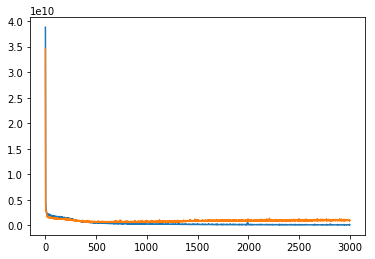

In [34]:
test(model=create_model4(), batch_size=32, epochs=3000)